# **Data used: **

financial data from yahoo: Autodesk, Inc. (ADSK)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy.io
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data=pd.read_csv('ADSK.csv')

datamatrix=data.to_numpy()

In [63]:
mat=datamatrix[:,1:5]

In [64]:
nTotal=1259*4
xx=np.reshape(mat,nTotal)

In [65]:
M=max(xx)
m=min(xx)
nxx = 1 + (xx - m)/(M - m)

In [66]:
nxx = np.asarray(nxx).astype('float32')

In [67]:
w=3*5
z=nxx[15:5036]

In [68]:
x=np.zeros((5021,15,1))

w=15
for i in range(5021):
  x[i,:,:]=np.transpose([nxx[i:i+w]])

new_shape = (5021, 5, 3)
reshaped_x = x.reshape(new_shape)

In [69]:
xtrain=reshaped_x[0:4900]
xtest=reshaped_x[4900:5021]
ztrain=z[0:4900]
ztest=z[4900:5021]

In [70]:
model = Sequential()
model.add(LSTM(145, input_shape=(5,3), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
model.fit(xtrain, ztrain, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
4900/4900 - 20s - loss: 0.0061 - 20s/epoch - 4ms/step
Epoch 2/20
4900/4900 - 19s - loss: 0.0012 - 19s/epoch - 4ms/step
Epoch 3/20
4900/4900 - 20s - loss: 8.6048e-04 - 20s/epoch - 4ms/step
Epoch 4/20
4900/4900 - 21s - loss: 7.1173e-04 - 21s/epoch - 4ms/step
Epoch 5/20
4900/4900 - 19s - loss: 6.5057e-04 - 19s/epoch - 4ms/step
Epoch 6/20
4900/4900 - 23s - loss: 5.2233e-04 - 23s/epoch - 5ms/step
Epoch 7/20
4900/4900 - 26s - loss: 4.9842e-04 - 26s/epoch - 5ms/step
Epoch 8/20
4900/4900 - 19s - loss: 4.4002e-04 - 19s/epoch - 4ms/step
Epoch 9/20
4900/4900 - 18s - loss: 4.2516e-04 - 18s/epoch - 4ms/step
Epoch 10/20
4900/4900 - 19s - loss: 3.7121e-04 - 19s/epoch - 4ms/step
Epoch 11/20
4900/4900 - 18s - loss: 3.6254e-04 - 18s/epoch - 4ms/step
Epoch 12/20
4900/4900 - 19s - loss: 3.3333e-04 - 19s/epoch - 4ms/step
Epoch 13/20
4900/4900 - 18s - loss: 3.3209e-04 - 18s/epoch - 4ms/step
Epoch 14/20
4900/4900 - 19s - loss: 3.1514e-04 - 19s/epoch - 4ms/step
Epoch 15/20
4900/4900 - 18s - loss: 3

In [72]:
xpredicted=model.predict(xtest)

4/4 [==============================] - 0s 5ms/step


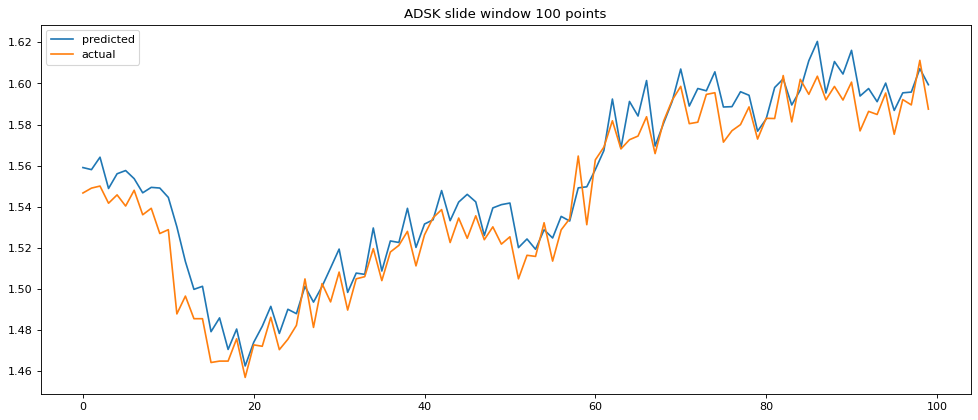

In [74]:
plt.figure(figsize=(15, 6), dpi=80)

plt.plot(range(100), xpredicted[0:100], label='predicted'.format(1))
plt.plot(range(100), ztest[0:100], label='actual'.format(2))

plt.legend(loc='best')
plt.title('ADSK slide window 100 points')
plt.show()